In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings('ignore')

In [14]:
diabetes= pd.read_csv("diabetes.csv")
print (diabetes.shape)
print ("--"*30)
print (diabetes.info())

(768, 9)
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [38]:
# class distribution
print(" Outcome distribution")
print(diabetes.groupby('Outcome').size())
ratio = diabetes['Outcome'].sum()/(diabetes['Outcome'].sum() + (1-diabetes['Outcome']).sum())
print(ratio)

 Outcome distribution
Outcome
0    500
1    268
dtype: int64
0.3489583333333333


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [17]:
# We replace the NaN values with the mean or median.
# Glucose and BloodPressure dont have much outliers, and we need little data to fill. The mean will be enough.
# The others, has a huge disparity between some samples, and we need a lot of data. So the median is best.
diabetes["Glucose"].fillna(diabetes["Glucose"].mean(),inplace=True)
diabetes["BloodPressure"].fillna(diabetes["BloodPressure"].mean(),inplace=True)
diabetes["SkinThickness"].fillna(diabetes["SkinThickness"].median(),inplace=True)
diabetes["Insulin"].fillna(diabetes["Insulin"].median(),inplace=True)
diabetes["BMI"].fillna(diabetes["BMI"].median(),inplace=True)

print (diabetes.isnull().sum())
print ('--'*40)
diabetes.info()
print ('--'*40)
diabetes.head()
diabetes.describe()

#1) Replace 0 values to NaN values. Then sum the null values in each of those features,
#to know how many null values we have.
diabetes_copy=diabetes.copy(deep=True) ## We will need later the diabetes dataset with the 0s.

diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=diabetes[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
print (diabetes.isnull().sum())
diabetes.describe()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
------------------------------------------------------

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


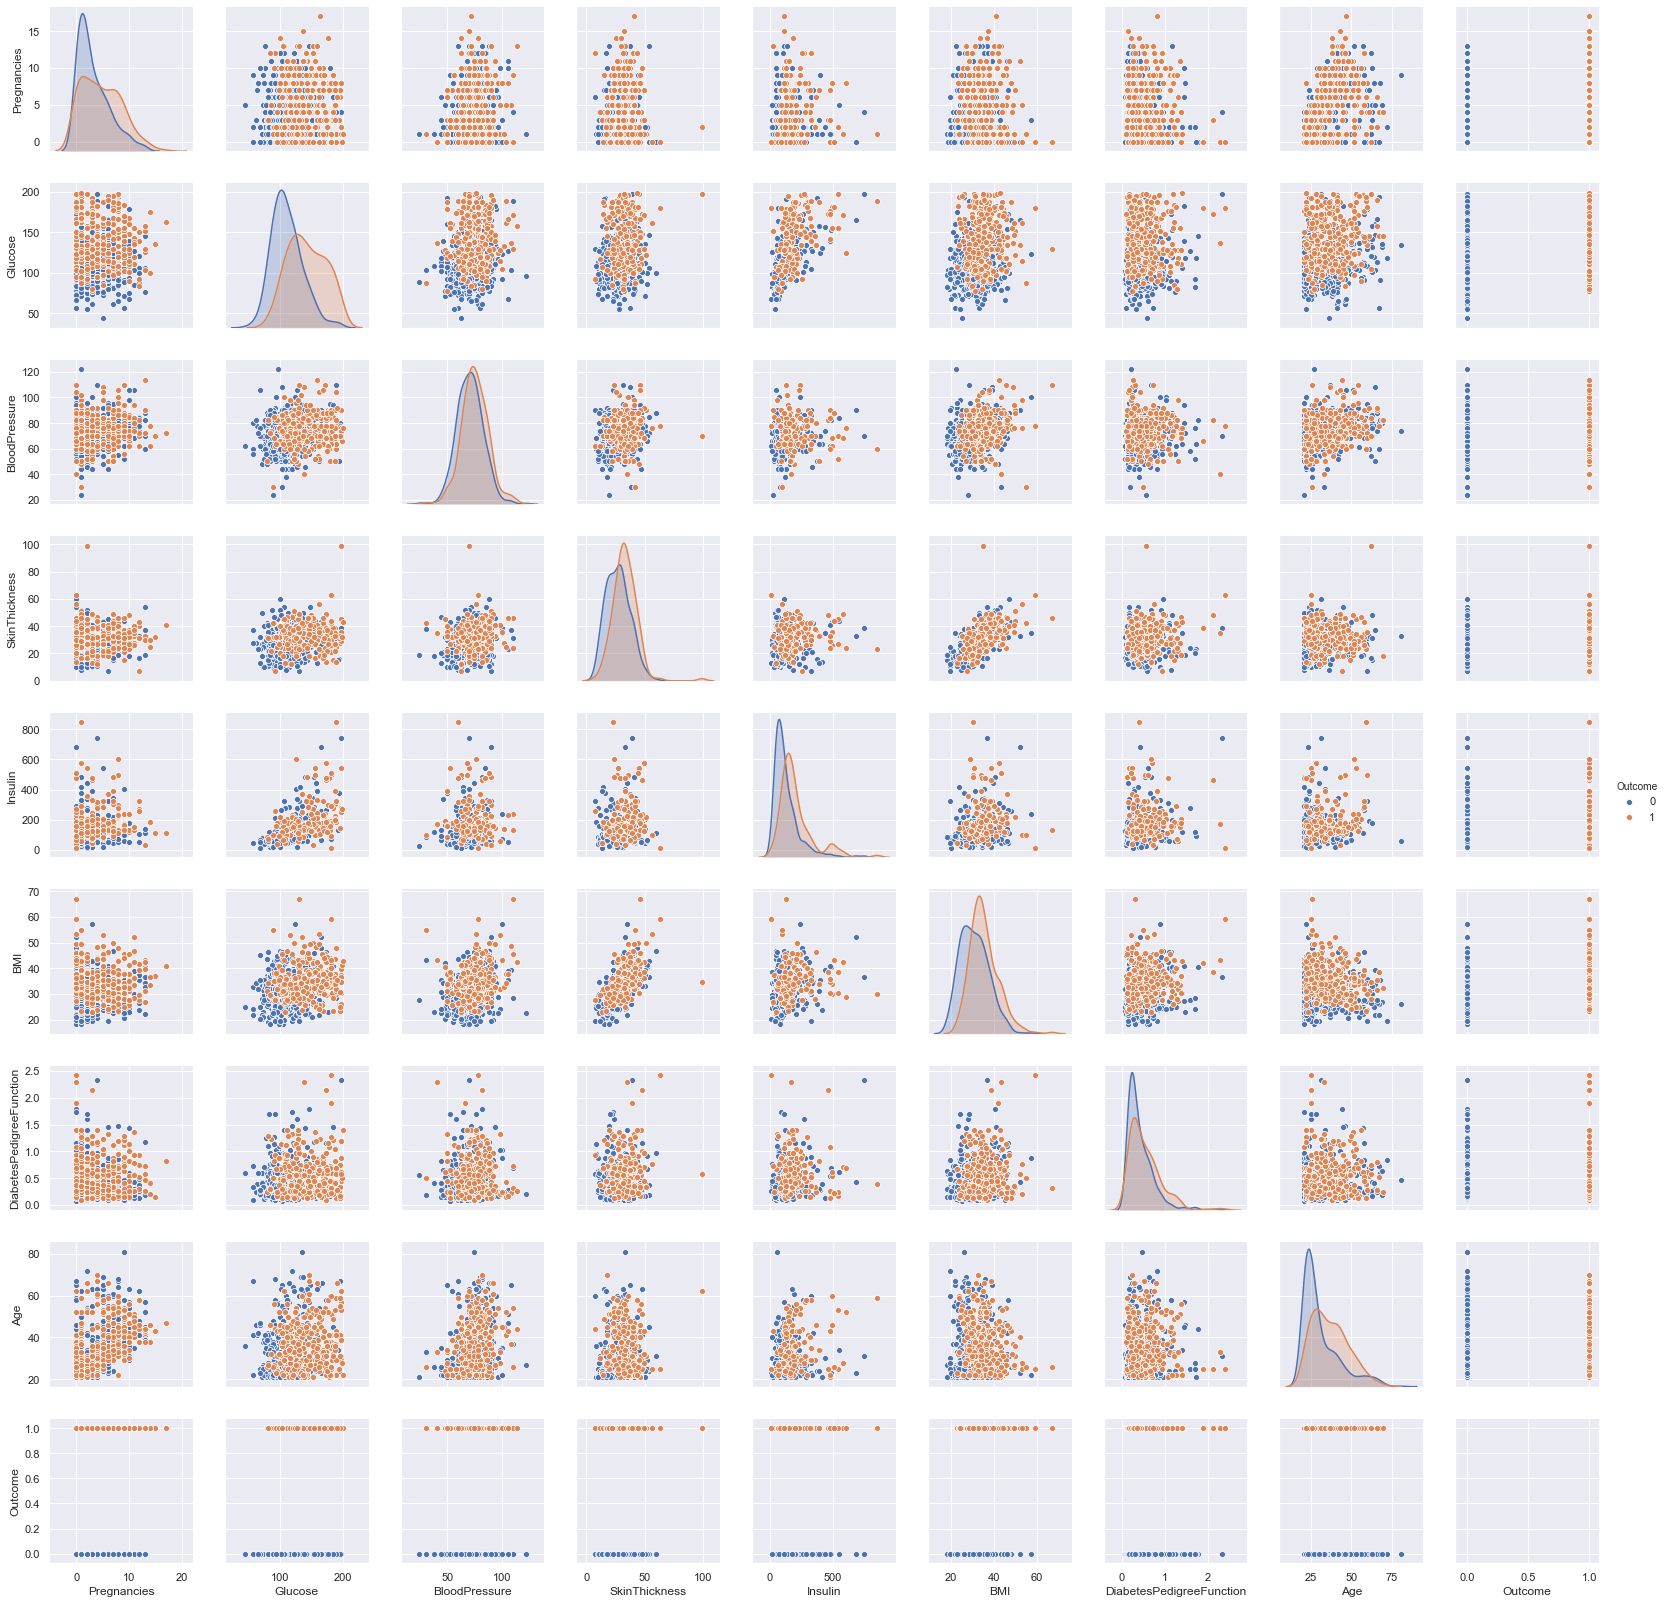

In [21]:
# pair plot for clean data
p=sns.pairplot(diabetes, hue = 'Outcome')

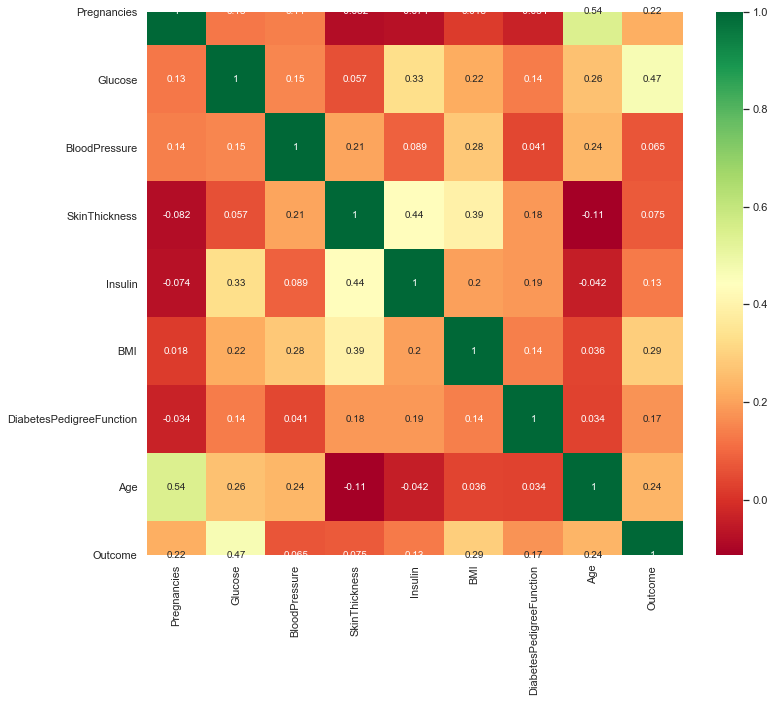

In [10]:
# heatmap for clean data
plt.figure(figsize=(12,10))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(diabetes.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [11]:
# import baseline models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from imblearn.over_sampling import SMOTE  
from imblearn.pipeline import Pipeline as Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import (GridSearchCV,StratifiedKFold)

In [19]:
# scale and split
from sklearn.preprocessing import StandardScaler
X=diabetes_copy.drop(["Outcome"], axis=1)
y=diabetes_copy["Outcome"]
print (X.info())
columnas=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X=pd.DataFrame(X_scaled, columns=[columnas])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=444, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
dtypes: float64(2), int64(6)
memory usage: 48.1 KB
None


In [22]:
def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

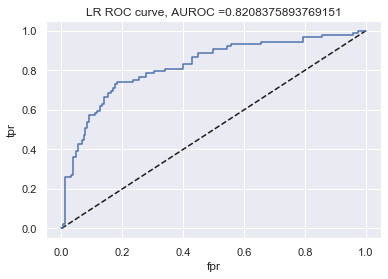

AUROC =  0.8208375893769151


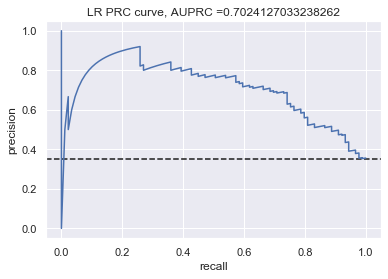

AUPRC =  0.7024127033238262
LR  for train_test split: AUROC =  0.8208375893769151 , AUPRC =  0.7024127033238262 , average precision = , 0.5793815801114748 .  Best threshold for ROC =  0.31820439881817947 , accuracy for the best ROC threshold is then  0.7519685039370079 , accuracy =  0.7834645669291339 . F1 score =  0.6496815286624205 , log loss =  -7.478922420773231 , recall = 0.5730337078651685 .
------------------------------------------------------------


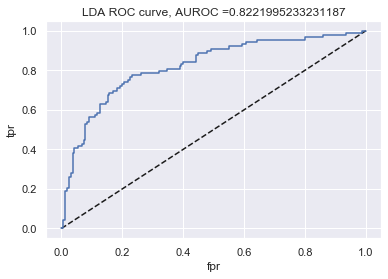

AUROC =  0.8221995233231187


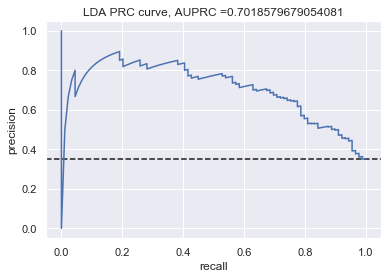

AUPRC =  0.7018579679054081
LDA  for train_test split: AUROC =  0.8221995233231187 , AUPRC =  0.7018579679054081 , average precision = , 0.5727953614216804 .  Best threshold for ROC =  0.3036221063935008 , accuracy for the best ROC threshold is then  0.7677165354330708 , accuracy =  0.7795275590551181 . F1 score =  0.6410256410256411 , log loss =  -7.614901855398864 , recall = 0.5617977528089888 .
------------------------------------------------------------


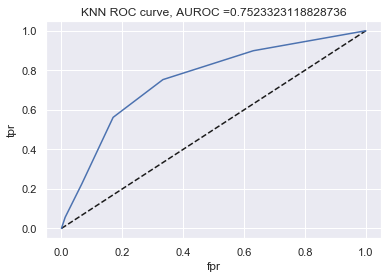

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, f1_score, log_loss, recall_score, precision_recall_curve, auc
from sklearn.metrics import roc_curve, accuracy_score
seed=7
models = [] # Here I will append all the algorithms that I will use. Each one will run in all the created datasets.
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
#models.append(('SVM', SVC()))
models.append(('AdaBoost', AdaBoostClassifier()))

#print("evaluation metric: " + scoring)    
results_accuracy=[]
results_auroc=[]
results_average_precision=[]
results_neg_log_loss=[]
results_f1 = []
results_recall =[]
names=[]
scores_table = np.zeros([7,8])
i = 0 # looping index
for name, model in models:
        y_pred_proba = model.fit(X_train, y_train).predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
        #Area under ROC curve
        auroc = roc_auc_score(y_test,y_pred_proba)
        plt.plot([0,1],[0,1],'k--')
        plt.plot(fpr,tpr, label=name)
        plt.xlabel('fpr')
        plt.ylabel('tpr')
        title_name = name + ' ROC curve, AUROC ='+str(auroc)
        plt.title(title_name)
        save_name = name + ' ROC curve.png'
        plt.savefig(save_name)
        plt.show()
        print('AUROC = ',auroc)
        precision, recall, thresholds = precision_recall_curve(y_test,y_pred_proba)
        auprc = auc(recall, precision)
        plt.axhline(y=ratio, xmin=0, xmax=1,color='k', linestyle = '--')
        plt.plot(recall,precision, label=name)
        plt.xlabel('recall')
        plt.ylabel('precision')
        title_name = name + ' PRC curve, AUPRC ='+str(auprc)
        plt.title(title_name)
        save_name = name + ' PRC curve.png'
        plt.show()
        print('AUPRC = ',auprc)
        threshold = Find_Optimal_Cutoff(y_test,y_pred_proba)
        y_pred = y_pred_proba>threshold
        accuracy_best_threshold = accuracy_score(y_test, y_pred)
        accuracy = accuracy_score(y_test, model.predict(X_test))
        average_precision = average_precision_score(y_test, model.predict(X_test))
        f1 = f1_score(y_test, model.predict(X_test))
        log_loss_score = -log_loss(y_test, model.predict(X_test))
        recall = recall_score(y_test, model.predict(X_test))
        names.append(name)
        

        # report of scores
        scores_table[i, 0] = auroc
        scores_table[i, 1] = auprc
        scores_table[i, 2] = accuracy_best_threshold
        scores_table[i, 3] = accuracy
        scores_table[i, 4] = average_precision
        scores_table[i, 5] = f1
        scores_table[i, 6] = log_loss_score
        scores_table[i, 7] = recall
        print(name,' for train_test split: AUROC = ',auroc,', AUPRC = ',auprc,', average precision = ,',average_precision, '.  Best threshold for ROC = ',threshold[0], ', accuracy for the best ROC threshold is then ',accuracy_best_threshold,', accuracy = ', accuracy,'. F1 score = ', f1, ', log loss = ',log_loss_score,', recall =', recall,'.')
        print ("--"*30)
        i = i + 1
        
print(scores_table)
np.savetxt("scores_table1024_new.csv", scores_table, delimiter=",")